# Pose Controller Simulation

In this notebook, we will run the pose stabilization controller from Problem 2

In [1]:
# The autoreload extension will automatically load in new code as you edit files, 
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
from utils import simulate_car_dyn, maybe_makedirs
from P2_pose_stabilization import PoseController

maybe_makedirs('plots')

### Various Constants
(Try changing the noise_scale and seeing what happens)

In [2]:
V_max = 0.5 # max speed
om_max = 1 # max rotational speed
tf  = 25 # final time (sec)
dt = 0.005
N = np.ceil( tf / dt ).astype(np.int32)

noise_scale = 0* np.sqrt(0.01) # noise level

### Goal State

In [3]:
x_g = 5
y_g = 5
th_g = -np.pi/2

### Controller
Let's create our controller and choose some gains. Try playing with different values for the gains.

In [4]:
k1 = 0.4
k2 = 0.45
k3 = 0.8

controller = PoseController(k1,k2,k3,V_max,om_max)

## Simulation
Now, let's simulate different parking maneuvers by choosing different start positions

## Scenario 1: Forward

The robot should start behind the desired goal pose.

In [5]:
# Fill these in
x_0_fw = 0
y_0_fw = 0
th_0_fw = np.pi/4

controller.load_goal(x_g, y_g, th_g)

times_fw = np.arange(0, tf+dt/2, dt)
states_fw, ctrl_fw = simulate_car_dyn(x_0_fw,y_0_fw,th_0_fw, times_fw, controller=controller, noise_scale=noise_scale)

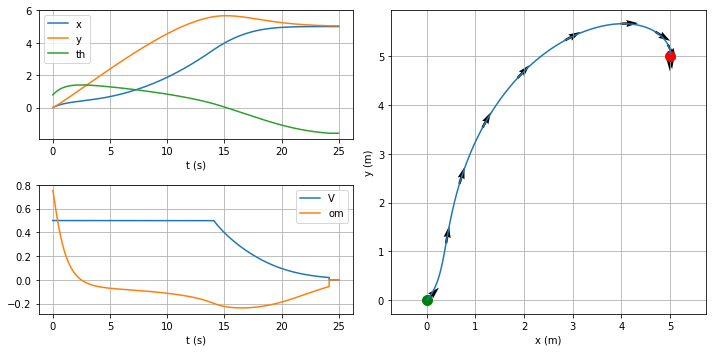

In [6]:
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
plt.plot(times_fw, states_fw)
plt.grid(True)
plt.xlabel('t (s)')
plt.legend(labels=["x","y","th"])
plt.subplot(2,2,3)
plt.plot(times_fw[:-1], ctrl_fw)
plt.grid(True)
plt.xlabel('t (s)')
plt.legend(labels=["V","om"])
plt.subplot(1,2,2)
plt.plot(x_0_fw,y_0_fw,'go',markerfacecolor='green',markersize=10)
plt.plot(x_g,y_g,'ro',markerfacecolor='red', markersize=10)
plt.plot(states_fw[:,0], states_fw[:,1])
rate = int(N/10)
plt.quiver(states_fw[::rate,0],states_fw[::rate,1],np.cos(states_fw[::rate,2]), np.sin(states_fw[::rate,2]))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.savefig("plots/sim_parking_forward.png")
plt.show()

## Scenario 2: Reverse

The robot should start ahead of the desired goal pose.

In [7]:
# Fill these in
x_0_bw = 10
y_0_bw = 10
th_0_bw = -3*np.pi/4

controller.load_goal(x_g, y_g, th_g)

times_bw = np.arange(0, tf+dt/2, dt)
states_bw, ctrl_bw = simulate_car_dyn(x_0_bw,y_0_bw,th_0_bw, times_bw, controller=controller, noise_scale=noise_scale)

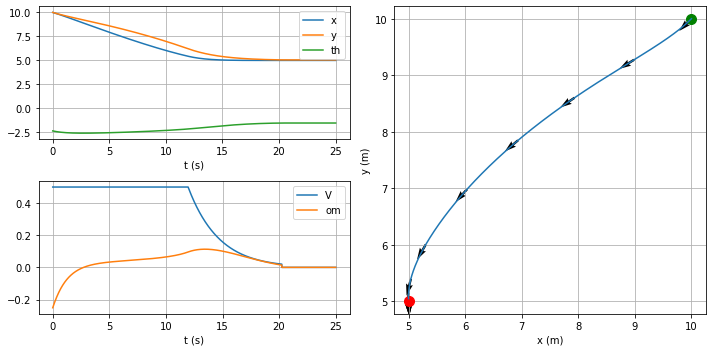

In [8]:
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
plt.plot(times_bw, states_bw)
plt.grid(True)
plt.xlabel('t (s)')
plt.legend(labels=["x","y","th"])
plt.subplot(2,2,3)
plt.plot(times_bw[:-1], ctrl_bw)
plt.grid(True)
plt.xlabel('t (s)')
plt.legend(labels=["V","om"])
plt.subplot(1,2,2)
plt.plot(x_0_bw,y_0_bw,'go',markerfacecolor='green',markersize=10)
plt.plot(x_g,y_g,'ro',markerfacecolor='red', markersize=10)
plt.plot(states_bw[:,0], states_bw[:,1])
rate = int(N/10)
plt.quiver(states_bw[::rate,0],states_bw[::rate,1],np.cos(states_bw[::rate,2]), np.sin(states_bw[::rate,2]))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.savefig("plots/sim_parking_reverse.png")
plt.show()

## Scenario 3: Parallel

The robot should start parallel to the desired goal pose.

In [9]:
# Fill these in
x_0_pp = 5
y_0_pp = 0
th_0_pp = np.pi/4

controller.load_goal(x_g, y_g, th_g)

times_pp = np.arange(0, tf+dt/2, dt)
states_pp, ctrl_pp = simulate_car_dyn(x_0_pp,y_0_pp,th_0_pp, times_pp, controller=controller, noise_scale=noise_scale)

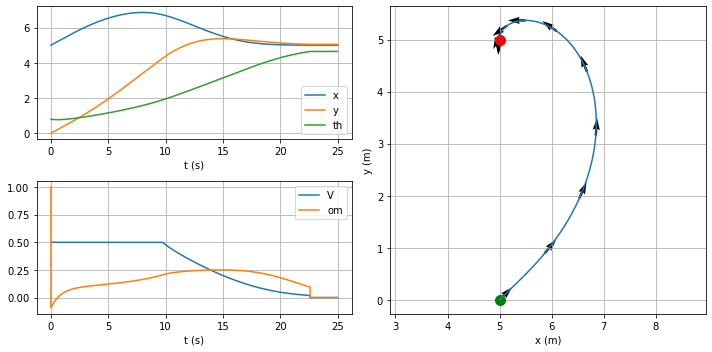

In [10]:
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
plt.plot(times_pp, states_pp)
plt.grid(True)
plt.xlabel('t (s)')
plt.legend(labels=["x","y","th"])
plt.subplot(2,2,3)
plt.plot(times_pp[:-1], ctrl_pp)
plt.grid(True)
plt.xlabel('t (s)')
plt.legend(labels=["V","om"])
plt.subplot(1,2,2)
plt.plot(x_0_pp,y_0_pp,'go',markerfacecolor='green',markersize=10)
plt.plot(x_g,y_g,'ro',markerfacecolor='red', markersize=10)
plt.plot(states_pp[:,0], states_pp[:,1])
rate = int(N/10)
plt.quiver(states_pp[::rate,0],states_pp[::rate,1],np.cos(states_pp[::rate,2]), np.sin(states_pp[::rate,2]))
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.savefig("plots/sim_parking_parallel.png")
plt.show()